<a href="https://colab.research.google.com/github/nmohankumar85/Website/blob/master/Bo_DataScience_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Challenge :** "Users often present a small number of data points, from which we should extract some meaning. Often the most valuable patterns we are concerned with are repeated payments or credits. Below are 12 months of fictional transactional data. We want to better understand what are repeated payments and any patterns in those transactions.

Here the task is to write python code to extract any patterns that i think are important with particular relevance to prediction. 

Please answer all questions; either answer A (a) or A (b) should be answered with Python code. Don’t spend more than 4 hours on this task please. 

A. Write code to read in the JSON file, extract the transaction data and perform an analysis on those transactions:

a. Write a generic algorithm to recognise income and spending patterns of the user.  Hint: Use tools and techniques you think are appropriate in best understanding user behaviour. How would you discover repeated payments?                         

b. How would you predict the next six months of transactions. Create a prediction method or function that can predict transactions based on any rules you discovered earlier. Be prepared to explain your reasoning.

B. If more users were provided, explain how you would use more user data from other users to give more insight into individual data patterns.

C. What pitfalls do you see in your analysis? Or the techniques used?"

In [0]:
# Importing Libraries
import os
from google.colab import drive

import pandas as pd
import numpy as np

import seaborn as sns

In [0]:
#Using the google colab for my data analysis, so mounting my google drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Coding "Write code to read in the JSON file, extract the transaction data and perform an analysis on those transactions"

In [0]:
#Read the data from json file to dataframe
df = pd.read_json('/content/drive/My Drive/Bonify/Data Scientist challenge.json', orient='columns')

# View the first ten rows
df.head(10)

,accountNo,amount,bookingDate,bookingType,booking_id,partnerAccountIBAN,user_id
0,781,-50,2015-07-15 02:00:03,ATM,1,None,106
1,781,-1000,2015-07-29 02:00:03,Rent,2,DE513,106
2,781,3566,2015-07-29 02:00:03,Salary,3,DE512,106
3,781,-160,2015-07-29 02:00:03,Installment,4,DE38900,106
4,781,450,2015-07-29 02:00:03,Unknown,5,DE40042,106
5,781,190,2015-07-29 02:00:03,Childbenefit,6,DE400423333,106
6,781,-50,2015-07-29 02:00:03,ATM,7,None,106
7,781,-50,2015-08-15 02:00:04,ATM,8,None,106
8,781,-1000,2015-08-29 02:00:04,Rent,9,DE513,106
9,781,5677,2015-08-29 02:00:04,Salary,10,DE512,106


In [0]:
df.shape

(96, 7)

In [0]:
df.describe(include = 'all')

,accountNo,amount,bookingDate,bookingType,booking_id,partnerAccountIBAN,user_id
count,96.0,96.000000,96,96,96.000000,96,96.0
unique,NaN,NaN,24,8,NaN,10,NaN
top,NaN,NaN,2016-06-27 02:00:00,ATM,NaN,None,NaN
freq,NaN,NaN,8,23,NaN,23,NaN
mean,781.0,615.802083,NaN,NaN,48.500000,NaN,106.0
std,0.0,2549.851668,NaN,NaN,27.856777,NaN,0.0
min,781.0,-2600.000000,NaN,NaN,1.000000,NaN,106.0
25%,781.0,-160.000000,NaN,NaN,24.750000,NaN,106.0
50%,781.0,-50.000000,NaN,NaN,48.500000,NaN,106.0
75%,781.0,450.000000,NaN,NaN,72.250000,NaN,106.0


In [0]:
#checking the unique entries in the booking type to understand the various transactions
df['bookingType'].unique()

array(['ATM', 'Rent', 'Salary', 'Installment', 'Unknown', 'Childbenefit',
       'GasStation', 'CarInsurance'], dtype=object)

In [0]:
#Checking the datatypes of each columns in dataframe
df.dtypes

accountNo              int64
amount                 int64
bookingDate           object
bookingType           object
booking_id             int64
partnerAccountIBAN    object
user_id                int64
dtype: object

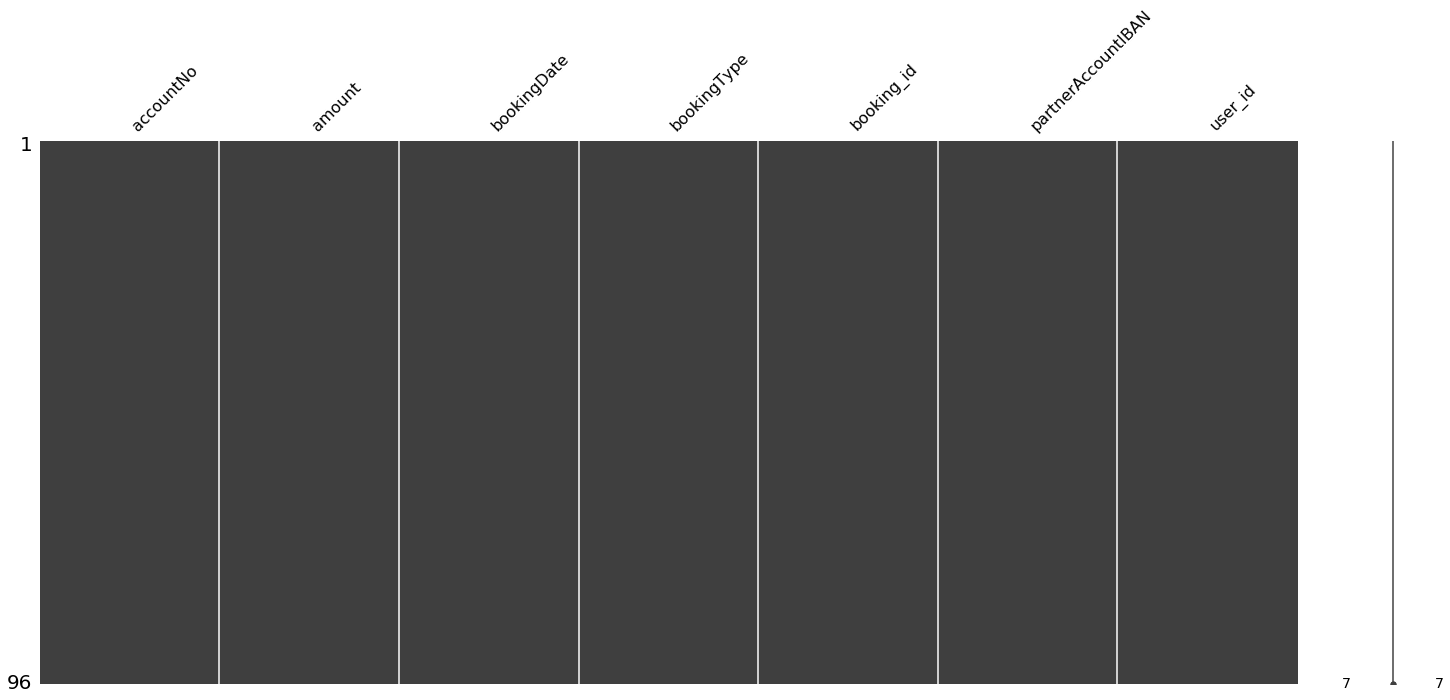

In [0]:
#Visualizing the missing values in dataframe
!pip install missingno
import missingno as msno
# Visualizing the missing vlues in each feature of a training data
msno.matrix(df)

In [0]:
#import datetime
df['month'] = pd.DatetimeIndex(df['bookingDate']).month
df['date'] = pd.DatetimeIndex(df['bookingDate']).day
df.head()

,accountNo,amount,bookingDate,bookingType,booking_id,partnerAccountIBAN,user_id,month,date
0,781,-50,2015-07-15 02:00:03,ATM,1,None,106,7,15
1,781,-1000,2015-07-29 02:00:03,Rent,2,DE513,106,7,29
2,781,3566,2015-07-29 02:00:03,Salary,3,DE512,106,7,29
3,781,-160,2015-07-29 02:00:03,Installment,4,DE38900,106,7,29
4,781,450,2015-07-29 02:00:03,Unknown,5,DE40042,106,7,29


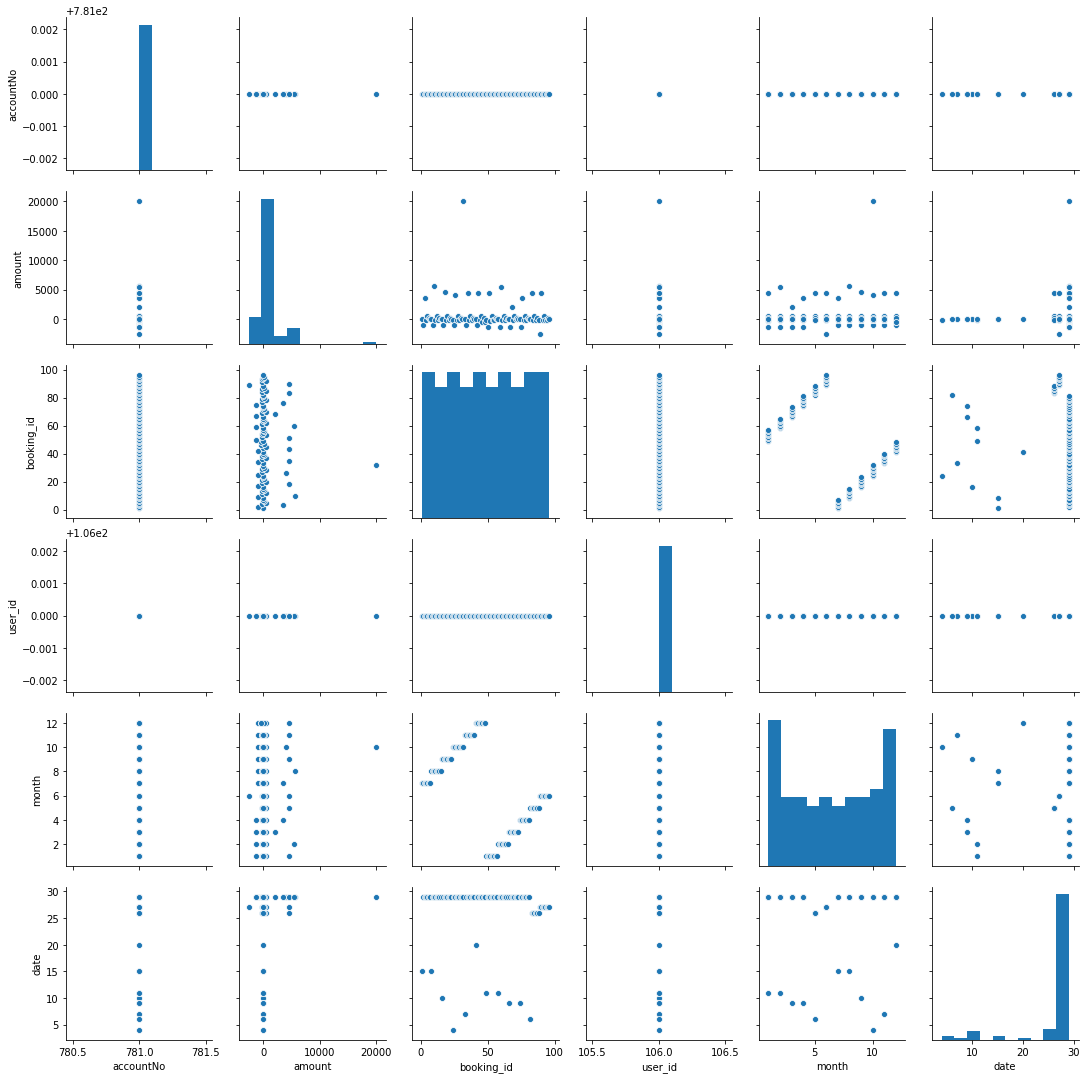

In [0]:
# Pair plot to see both distribution of single features and relationships between two features 
sns.pairplot(df.dropna())

###At the first look of the data, it shows no specific trend and it is a non linear data. Also it seems amount, bookingDate and bookingType are enough to build a prediction algorithm parameters and the remaining parameters does not seems to have a correlation.


<function matplotlib.pyplot.show>

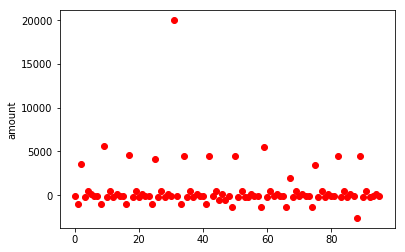

In [0]:
#Plotting the amount to see the trend
import matplotlib.pyplot as plt
#plt.plot(df['bookingDate'],df['amount'],'ro')
plt.plot(df['amount'],'ro')
plt.ylabel('amount')
plt.show

### From analysis so far, i can understand that any amount which is a positive number is an income and a negetive number is an expense.

In [0]:
#Extracting only income transactions
df_income = df[df['amount']>0]
df_income.head()

,accountNo,amount,bookingDate,bookingType,booking_id,partnerAccountIBAN,user_id,month,date
2,781,3566,2015-07-29 02:00:03,Salary,3,DE512,106,7,29
4,781,450,2015-07-29 02:00:03,Unknown,5,DE40042,106,7,29
5,781,190,2015-07-29 02:00:03,Childbenefit,6,DE400423333,106,7,29
9,781,5677,2015-08-29 02:00:04,Salary,10,DE512,106,8,29
11,781,450,2015-08-29 02:00:04,Unknown,12,DE40042,106,8,29


<function matplotlib.pyplot.show>

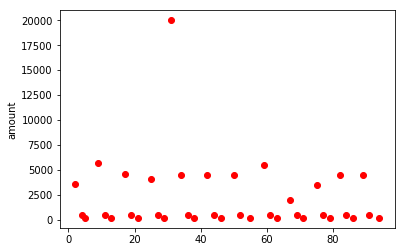

In [0]:
#Plotting the income amount to see the trend
plt.plot(df_income['amount'],'ro')
plt.ylabel('amount')
plt.show

In [0]:
#Extracting only expense transactions
df_expense = df[df['amount']<0]
df_expense.head()

,accountNo,amount,bookingDate,bookingType,booking_id,partnerAccountIBAN,user_id
0,781,-50,2015-07-15 02:00:03,ATM,1,None,106
1,781,-1000,2015-07-29 02:00:03,Rent,2,DE513,106
3,781,-160,2015-07-29 02:00:03,Installment,4,DE38900,106
6,781,-50,2015-07-29 02:00:03,ATM,7,None,106
7,781,-50,2015-08-15 02:00:04,ATM,8,None,106


<function matplotlib.pyplot.show>

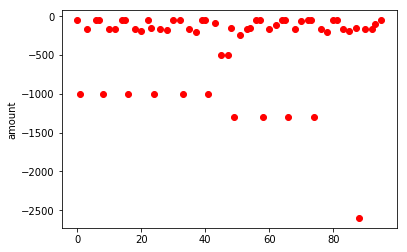

In [0]:
#Plotting the expense amount to see the trend
plt.plot(df_expense['amount'],'ro')
plt.ylabel('amount')
plt.show

In [0]:
#extracting month and day from date
df['month'] = pd.DatetimeIndex(df['bookingDate']).month
df['date'] = pd.DatetimeIndex(df['bookingDate']).day
df.head()

,accountNo,amount,bookingDate,bookingType,booking_id,partnerAccountIBAN,user_id,month,date
0,781,-50,2015-07-15 02:00:03,ATM,1,None,106,7,15
1,781,-1000,2015-07-29 02:00:03,Rent,2,DE513,106,7,29
2,781,3566,2015-07-29 02:00:03,Salary,3,DE512,106,7,29
3,781,-160,2015-07-29 02:00:03,Installment,4,DE38900,106,7,29
4,781,450,2015-07-29 02:00:03,Unknown,5,DE40042,106,7,29


In [0]:
Below code answers "Write a generic algorithm to recognise spending patterns of the user"

In [0]:
# This function will print the repeating pattern of each transaction type
# (i.e, in Months or Days)
def get_repeated_transaction_type(data: pd.DataFrame):
    try:
        # validate input
        if len(data) < 1:
            raise ValueError("Empty Data")
    
        # get the booking types value counts
        booking_types = pd.DataFrame(df['bookingType'].value_counts())
        
        # form data frame with booking types and the count for each booking type
        booking_types = booking_types.rename(columns = {"bookingType": "count"})
        booking_types['bookingType'] = booking_types.index
        booking_types = booking_types.reset_index(drop=True)
        
        # loop through each booking type and print the repeating pattern
        for i, booking_type in enumerate(booking_types['bookingType']):
            # get the booking type count
            count = booking_types['count'][i]
            
            # assuming the data is one year long so dividing the 12 by count to get the number of months
            # this 12 can be changed later. due to time constraint fixed as 12.
            month_count = 12/count
            
            # if month_count is less than 1 then get the number of days 
            days = 0
            # if month_count is around 0.9 then rounding to the 1 month
            if month_count < 1 and month_count > 0.9:
                final_count = 1
                days = 0
            # if count is less than 0.9 then calculating the days
            elif month_count < 1:
                final_count = int(month_count * 30)
                days = 1
            else:
                final_count = int(month_count)
                days = 0
                
            pattern_type = ''
            if days == 1:
                pattern_type = "Days"        
            elif final_count == 1:
                pattern_type = "Month"
            elif final_count > 1:
                pattern_type = "Months"
            
            # print the pattern
            print("%s is repeating every %d %s"%(booking_type, final_count, pattern_type))
    # handle the exception
    except BaseException as exception:
        print(exception)

In [0]:
#Calling function
get_repeated_transaction_type(df)

ATM is repeating every 15 Days
Unknown is repeating every 1 Month
Installment is repeating every 1 Month
Salary is repeating every 1 Month
Childbenefit is repeating every 1 Month
Rent is repeating every 1 Month
GasStation is repeating every 1 Month
CarInsurance is repeating every 6 Months


**Predictive Model Building :  This part of the code predicts the spending pattern of the user for next 6 months.**

In [0]:
#extract  expenditure and the income intoseparate data frame with only amount and bookingDate columns
df_exp = df[['amount','bookingDate']][df['amount']<0]
df_income = df[['amount','bookingDate']][df['amount']>0]
df_income.head()

,amount,bookingDate
2,3566,2015-07-29 02:00:03
4,450,2015-07-29 02:00:03
5,190,2015-07-29 02:00:03
9,5677,2015-08-29 02:00:04
11,450,2015-08-29 02:00:04


In [0]:
#Building the prediction algorithm ARIMA to predict the next 6 months transaction.
from statsmodels.tsa.arima_model import ARIMA

def predict_data(data:pd.DataFrame, time_to_predict:int)->pd.DataFrame:
  try:
    #validate inputs
    if time_to_predict < 1:
      raise ValueError("Time to prdeict should atleat be 1 month")
      
    if len(data) < 1:
      raise ValueError("Empty dataframe recieved")
    
    # Set the bookingDate column as the index and convert into a datatime datatype
    data['bookingDate'] =pd.to_datetime(data['bookingDate'])
    data.index = data['bookingDate']
    
    #Group the data by month, and take the sum for each  group (i.e each month)
    df_sum_amount = data.resample('M').sum()
    
    #Apply ARIMA model
    for x in range(0,time_to_predict):
      #fit model
      model = ARIMA(df_sum_amount, order=(0,1,1))
      model_fit = model.fit(trend='nc', disp=False)
      #make prediction
      yhat = model_fit.predict(len(df_sum_amount), len(df_sum_amount), typ='levels')
      df_sum_amount = df_sum_amount.append(pd.DataFrame({'amount':yhat[0]}, index=[yhat.index[0]]))
      
    return df_sum_amount
  #handling all kinds of exceptions
  except BaseException as exception:
    print(exception)
    return
    

In [0]:
#Predicting the income for the next 6 months
income_prediction = predict_data(df_income, 6)
income_prediction

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M wil

,amount
2015-07-31,4206.000000
2015-08-31,6317.000000
2015-09-30,5195.000000
2015-10-31,24740.000000
2015-11-30,5140.000000
2015-12-31,5140.000000
2016-01-31,5150.000000
2016-02-29,6140.000000
2016-03-31,2640.000000
2016-04-30,4140.000000


In [0]:
#Predicting the expense for the next 6 months
expenditure_prediction = predict_data(df_exp, 6)
expenditure_prediction

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M wil

,amount
2015-07-31,-1260.000000
2015-08-31,-1420.000000
2015-09-30,-1450.000000
2015-10-31,-1537.000000
2015-11-30,-1459.000000
2015-12-31,-2130.000000
2016-01-31,-2055.000000
2016-02-29,-1671.000000
2016-03-31,-1620.000000
2016-04-30,-1760.000000


B.	 If more users were provided, explain how you would use more user data from other users to give more insight into individual data patterns.

**Answer:**  More user data would help in understanding the spending pattern of each user and would also help in predicting the future spending pattern for any new user if additional features are provided. Having more user data help us to create a clusters or segments of users based on their spending patterns.
If given additional features of users like the country, living city, age , gender, education, economical status, credit score, purchasing power etc ,by using these additional features we will be able to predict the future spending pattern of any new user or the existing user.


C.	What pitfalls do you see in your analysis? Or the techniques used?"

**Answer:** The analysis is mostly restricted by limited data and also the absence of independent features for validation. Given more data samples, machine learning methods like like linear regression, support vector machine or tree based models could be applied to predict the future transactions.


In [0]:
#End